### Detecting the brightness of any image

* Requirements
    * apt-get install python3-pip
    * pip3 install torch
    * pip3 install torchvision
    * pip3 install opencv-python
    * pip3 install matplotlib
    * pip3 install numpy
    * pip3 install Pillow
    
    * JPEGImages folder (from Imagenet dataset): Provided
    

* Dataset preperation:
    * Downloaded the Imagenet dataset
    * Took JPEGImages folder in current directory
    * Everything else is generated using this python program
    * As i needed to prepare the dataset for brightness detection so ran simple image analysis
        *Tested different method, they all seem to returns a close value, but not exactly the same as the others. Almost all methods run about the same speed except where we calculated "perceived brightness" of pixels, then return average which is much slower depending on the image size.
    * Visualized the color-distribution after normalizing the perceived brightness value between 0-10 as we needed 10 classes
    * Saved the images according in different folder named as their corresponding labels


* Model building
    * Used pytorch for it. 
    * Used transfer learning where i basically took pretrained resnet18 and removed the last layer and trained it again on my dataset.
    * Applied data augmentation for further increasing the data


* Training
    * Trained on Intel® Core™ i5 with default Intel® HD Graphics 520 graphic card.
    * Due to hardware limitation its trained just for 5 epochs
    * Can be trained on colab for much better results


* Testing
    * Tested the model on images saved in validation folder


* Visualizing some results
    * Visualized the performance on random validation images 

In [1]:
import glob,os
!ls

brightness.ipynb  JPEGImages


In [2]:
from tqdm import tqdm

In [3]:
import math
from PIL import Image, ImageStat
import numpy as np

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.utils import shuffle

In [6]:
d=os.listdir('JPEGImages')

In [7]:
current_dir = 'JPEGImages'
percentage_test = 10;
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in tqdm(glob.iglob(os.path.join(current_dir, "*.jpg"))):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    if counter == index_test:
        counter = 1
        file_test = open('test.txt', 'a+')
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
        file_test.close()
    else:
        file_train = open('train.txt', 'a+')
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1
        file_train.close()


17125it [00:01, 16520.97it/s]


In [8]:
!ls

brightness.ipynb  JPEGImages  test.txt	train.txt


In [9]:
def brightness( im_file ):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.rms[0]

#### Can also use :
* brightness  =  sqrt( .241 R2 + .691 G2 + .068 B2 )

* def brightness_alternative( im_file ):

    im = Image.open(im_file)
    stat = ImageStat.Stat(im)
    r,g,b = stat.rms
    return math.sqrt(0.241*(r**2) + 0.691*(g**2) + 0.068*(b**2))

### Pre-processing of training dataset

In [10]:
stats_pb=[]
image_desc=[]
s=''
file = open('train.txt','r')
for line in tqdm(file):
    s=line.strip()
    image_desc.append(s)
    stats_pb.append(brightness(s))

15413it [01:13, 210.22it/s]


In [11]:
stats_pb_training=np.asarray(stats_pb)

### Visualizing the color distribution

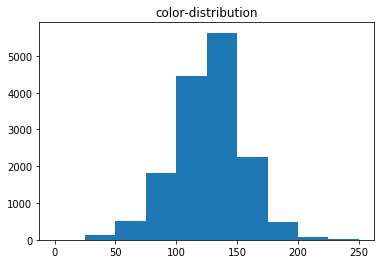

In [12]:
b=[x for x in range(0,251,25)]
plt.hist(stats_pb_training,bins = b) 
plt.title("color-distribution") 
plt.show()

In [13]:
total=0
for j in range(len(b)-1):
    l1=[]
    for i in range(len(stats_pb_training)):
        if stats_pb_training[i]>=b[j] and stats_pb_training[i]<=b[j+1]:
                l1.append(i)
    l1=shuffle(l1)
    print(len(l1))
    total=total+len(l1)
    print("-------")
print("Total :",total)

7
-------
141
-------
524
-------
1822
-------
4464
-------
5632
-------
2251
-------
478
-------
81
-------
13
-------
Total : 15413


### Normalizing the dataset between 0-10 values as required for labels

In [14]:
normalized_stats_pb_training=[]
normalized_stats_pb_training=((stats_pb_training-min(stats_pb_training))*12/(max(stats_pb_training)-min(stats_pb_training)))

In [15]:
normalized_dataset_index=[]
b=[x for x in range(0,12,1)]
total=0
for j in range(len(b)-1):
    l1=[]
    for i in range(len(normalized_stats_pb_training)):
        if normalized_stats_pb_training[i]>=b[j] and normalized_stats_pb_training[i]<=b[j+1]:
                l1.append(i)
    l1=shuffle(l1)
    normalized_dataset_index.append([j,len(l1),l1])
    print(len(l1))
    total=total+len(l1)
    print("-------")
print("Total :",total)

39
-------
146
-------
423
-------
1106
-------
2527
-------
4336
-------
4208
-------
1880
-------
570
-------
130
-------
40
-------
Total : 15405


#### Visualizing the normalized color-distribution

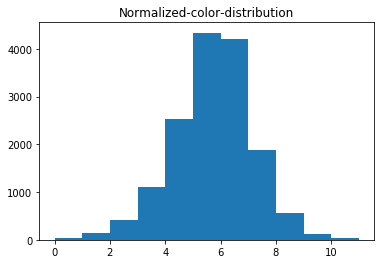

In [16]:
b=[x for x in range(0,12,1)]
plt.hist(normalized_stats_pb_training,bins = b) 
plt.title("Normalized-color-distribution") 
plt.show()

#### Making of dataset

In [17]:
import cv2
os.mkdir('train')
for i in tqdm(range(0,len(normalized_dataset_index))):
    os.mkdir('train/'+str(i))
    for j in (range(0,normalized_dataset_index[i][1])):
        img_l=cv2.imread(image_desc[j])
        cv2.imwrite('train/'+str(i)+'/'+image_desc[normalized_dataset_index[i][2][j]].split('/')[1],img_l)

100%|██████████| 11/11 [01:30<00:00,  5.73s/it]


In [18]:
len(normalized_dataset_index)

11

### Similary lets create the test dataset

In [19]:
stats_pb_test=[]
image_desc_test=[]
s=''
file = open('test.txt','r')
for line in tqdm(file):
    s=line.strip()
    image_desc_test.append(s)
    stats_pb_test.append(brightness(s))

stats_pb_testing=np.asarray(stats_pb_test)

1712it [00:29, 58.41it/s]


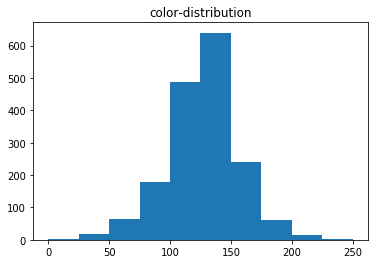

In [20]:
b=[x for x in range(0,251,25)]
plt.hist(stats_pb_testing,bins = b) 
plt.title("color-distribution") 
plt.show()

In [21]:
normalized_stats_pb_testing=[]
normalized_stats_pb_testing=((stats_pb_testing-min(stats_pb_testing))*12/(max(stats_pb_testing)-min(stats_pb_testing)))

In [22]:
normalized_dataset_index_testing=[]
b=[x for x in range(0,12,1)]
total=0
for j in range(len(b)-1):
    l1=[]
    for i in range(len(normalized_stats_pb_testing)):
        if normalized_stats_pb_testing[i]>=b[j] and normalized_stats_pb_testing[i]<=b[j+1]:
                l1.append(i)
    l1=shuffle(l1)
    normalized_dataset_index_testing.append([j,len(l1),l1])
    print(len(l1))
    total=total+len(l1)
    print("-------")
print("Total :",total)

4
-------
18
-------
51
-------
102
-------
230
-------
453
-------
495
-------
219
-------
96
-------
29
-------
12
-------
Total : 1709


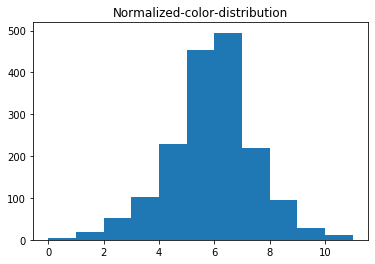

In [23]:
b=[x for x in range(0,12,1)]
plt.hist(normalized_stats_pb_testing,bins = b) 
plt.title("Normalized-color-distribution") 
plt.show()

In [24]:
import cv2
os.mkdir('val')
for i in tqdm(range(0,len(normalized_dataset_index_testing))):
    os.mkdir('val/'+str(i))
    for j in (range(0,normalized_dataset_index_testing[i][1])):
        img_l=cv2.imread(image_desc[j])
        cv2.imwrite('val/'+str(i)+'/'+image_desc[normalized_dataset_index_testing[i][2][j]].split('/')[1],img_l)

100%|██████████| 11/11 [00:09<00:00,  1.14it/s]


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy
from torchvision import datasets, models, transforms
import torchvision
from torch.autograd import Variable

In [26]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [57]:
image_datasets = {x: datasets.ImageFolder(x,
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=128,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [58]:
class_names

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [59]:
model_conv=torchvision.models.resnet18(pretrained=True)

In [60]:
#freeze all layers in the network
for param in model_conv.parameters():
    param.requires_grad=False

In [61]:
#get the number of inputs of the last layer
num_features=model_conv.fc.in_features
print(num_features)

512


In [62]:
#reconstruct the last layer (output layer) to have only two classes
model_conv.fc=nn.Linear(num_features,11)

In [63]:
if torch.cuda.is_available():
    model_conv=model_conv.cuda()

In [64]:
criterion = nn.CrossEntropyLoss()
#only optimizzing the parameters of last layer
optimizer = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)
#Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

#### TRAINING

In [65]:
num_epochs = 5
train_accuaracy_log=[]
train_loss_log=[]
for epoch in tqdm(range (num_epochs)):
    print(epoch)
    exp_lr_scheduler.step()
    #Reset the correct to 0 after passing through all the dataset
    correct = 0
    ci=0
    for images,labels in dataloaders['train']:
        ci+=1
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        #print("recieved input and corresponding output", ci)    
        optimizer.zero_grad()
        outputs = model_conv(images)
        loss = criterion(outputs, labels)
        loss.backward()
        #print("Backward propagation",loss)
        optimizer.step()  
        _, predicted = torch.max(outputs, 1) 
        correct += (predicted == labels).sum()
        #print("Predicted")
    train_acc = 100 * correct / dataset_sizes['train']
    train_loss_log.append(loss)
    train_accuaracy_log.append(train_acc)   
    print ('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {}%'
            .format(epoch+1, num_epochs, loss.item(), train_acc))


  0%|          | 0/5 [00:00<?, ?it/s]

0



 20%|██        | 1/5 [14:34<58:16, 874.18s/it]

Epoch [1/5], Loss: 1.8062, Train Accuracy: 25%
1



 40%|████      | 2/5 [29:29<44:01, 880.51s/it]

Epoch [2/5], Loss: 1.7761, Train Accuracy: 27%
2


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 138, in __getitem__
    sample = self.loader(path)
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 174, in default_loader
    return pil_loader(path)
  File "/home/vaibhav/.local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 155, in pil_loader
    with open(path, 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'train/8/2010_002905.jpg'


### TESTING


In [ ]:
# Test the model
model_conv.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in dataloaders['val']:
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model_conv(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy: {:.3f} %'.format(100 * correct / total))

### Visualizing some predictions 

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
shown_batch = 0
index = 0
with torch.no_grad():
    for (images, labels) in dataloaders['val']:
        if shown_batch == 1:
            break
        shown_batch += 1
        images = Variable(images)
        labels = Variable(labels)
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model_conv(images)                            
        _, preds = torch.max(outputs, 1)                        
        
        for i in range(4):
            index += 1
            ax = plt.subplot(2,2,index)
            ax.axis('off')
            ax.set_title('Predicted Label: {}'.format(class_names[preds[i]]))
            input_img = images.cpu().data[i]                    
            inp = input_img.numpy().transpose((1, 2, 0))        
            mean = np.array([0.485, 0.456, 0.406])
            std = np.array([0.229, 0.224, 0.225])
            inp = std * inp + mean 
            plt.imshow(inp)